STEP 1: Analyzing Event Marker Structure
Total events: 120
Event columns: ['onset', 'duration', 'trial_type', 'response_time', 'value', 'stim_file']

First 15 events:
    onset  duration  trial_type  response_time  value  stim_file
0       1      2000           1            NaN      1  stim1.png
1    2001      4000           1            NaN      2  stim2.mp4
2    6001      2000           1            NaN      3  stim3.png
3    8001      2000           2            NaN      1  stim1.png
4   10001      4000           2            NaN      2  stim2.mp4
5   14001      2000           2            NaN      3  stim3.png
6   16001      2000           1            NaN      1  stim1.png
7   18001      4000           1            NaN      2  stim2.mp4
8   22001      2000           1            NaN      3  stim3.png
9   24001      2000           2            NaN      1  stim1.png
10  26001      4000           2            NaN      2  stim2.mp4
11  30001      2000           2            NaN      3

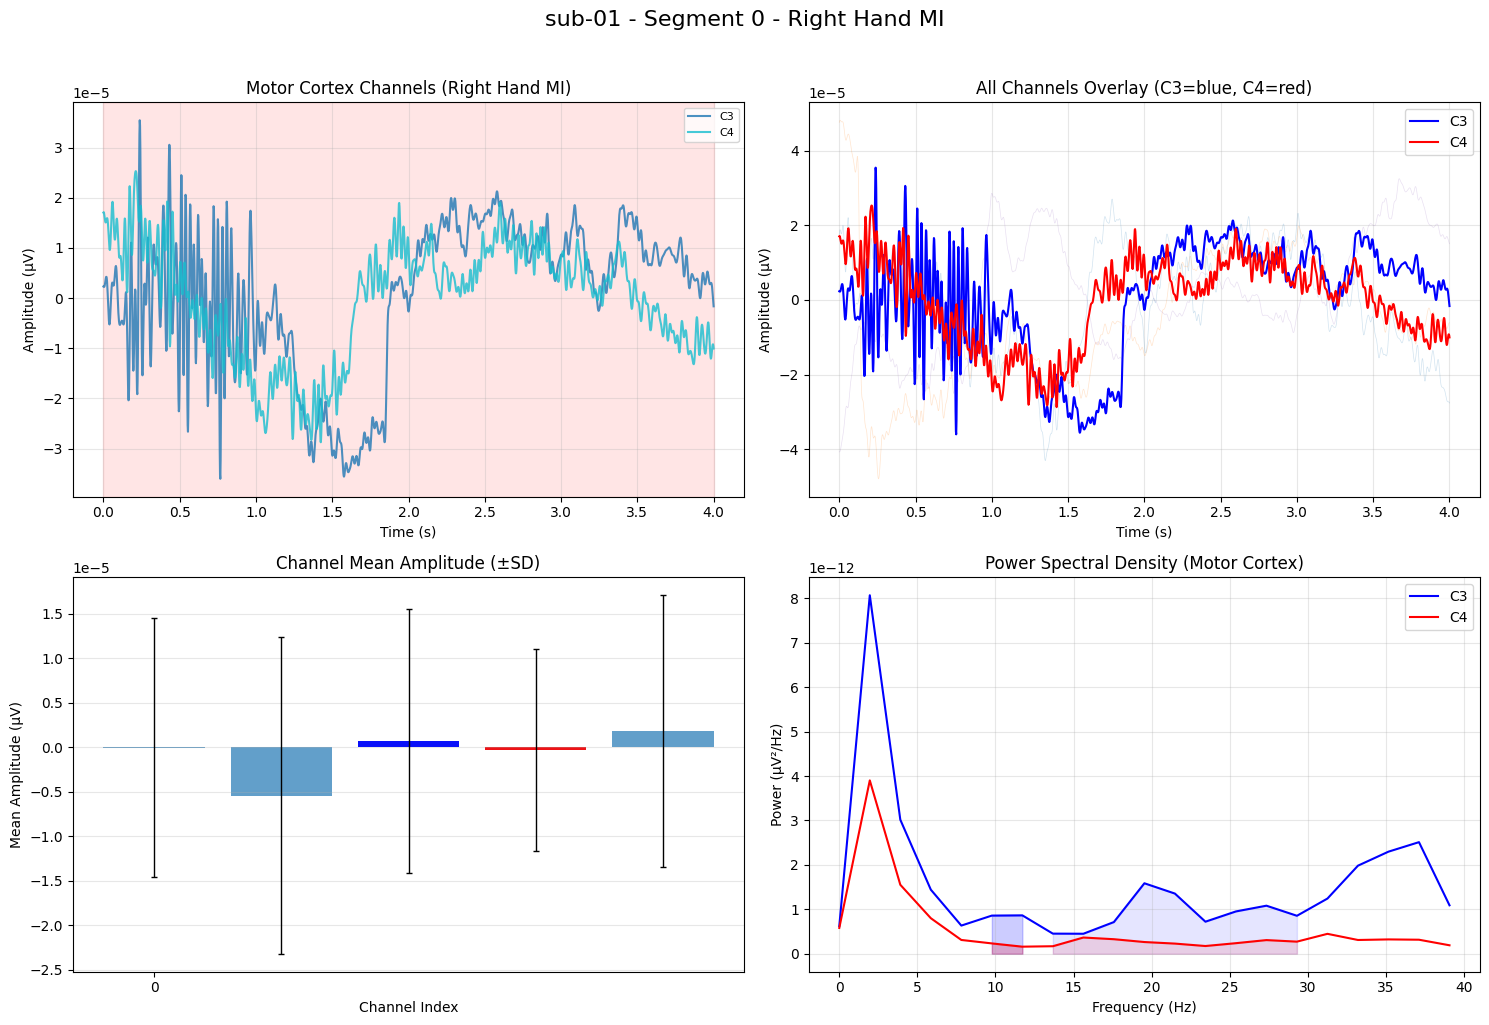


📊 Segment 0 Statistics:
  Subject: sub-01
  Label: 2 (Right hand)
  Shape: (5, 2000)
  C3: 0.00 ± 0.00 μV
  C4: -0.00 ± 0.00 μV

STEP 9: Ready to Process Full Dataset
To process the dataset using event markers, run:

# Test with 2 subjects
print("Testing with 2 subjects using event markers...")
test_results = process_all_subjects_with_events(base_path, max_subjects=2, save_results=True)

# Visualize results
if test_results and 'sub-01' in test_results:
    visualize_labeled_segments(test_results['sub-01'], segment_idx=0)
    visualize_labeled_segments(test_results['sub-01'], segment_idx=1)

# Process all subjects
print("\nProcessing all subjects using event markers...")
all_results = process_all_subjects_with_events(base_path, save_results=True)


QUICK TEST RUN
Running quick test with 1 subject...

PROCESSING 1 SUBJECTS USING EVENT MARKERS

[1/1] Processing sub-01
  ✅ Extracted 40 segments
  💾 Saved to: D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2\results\event

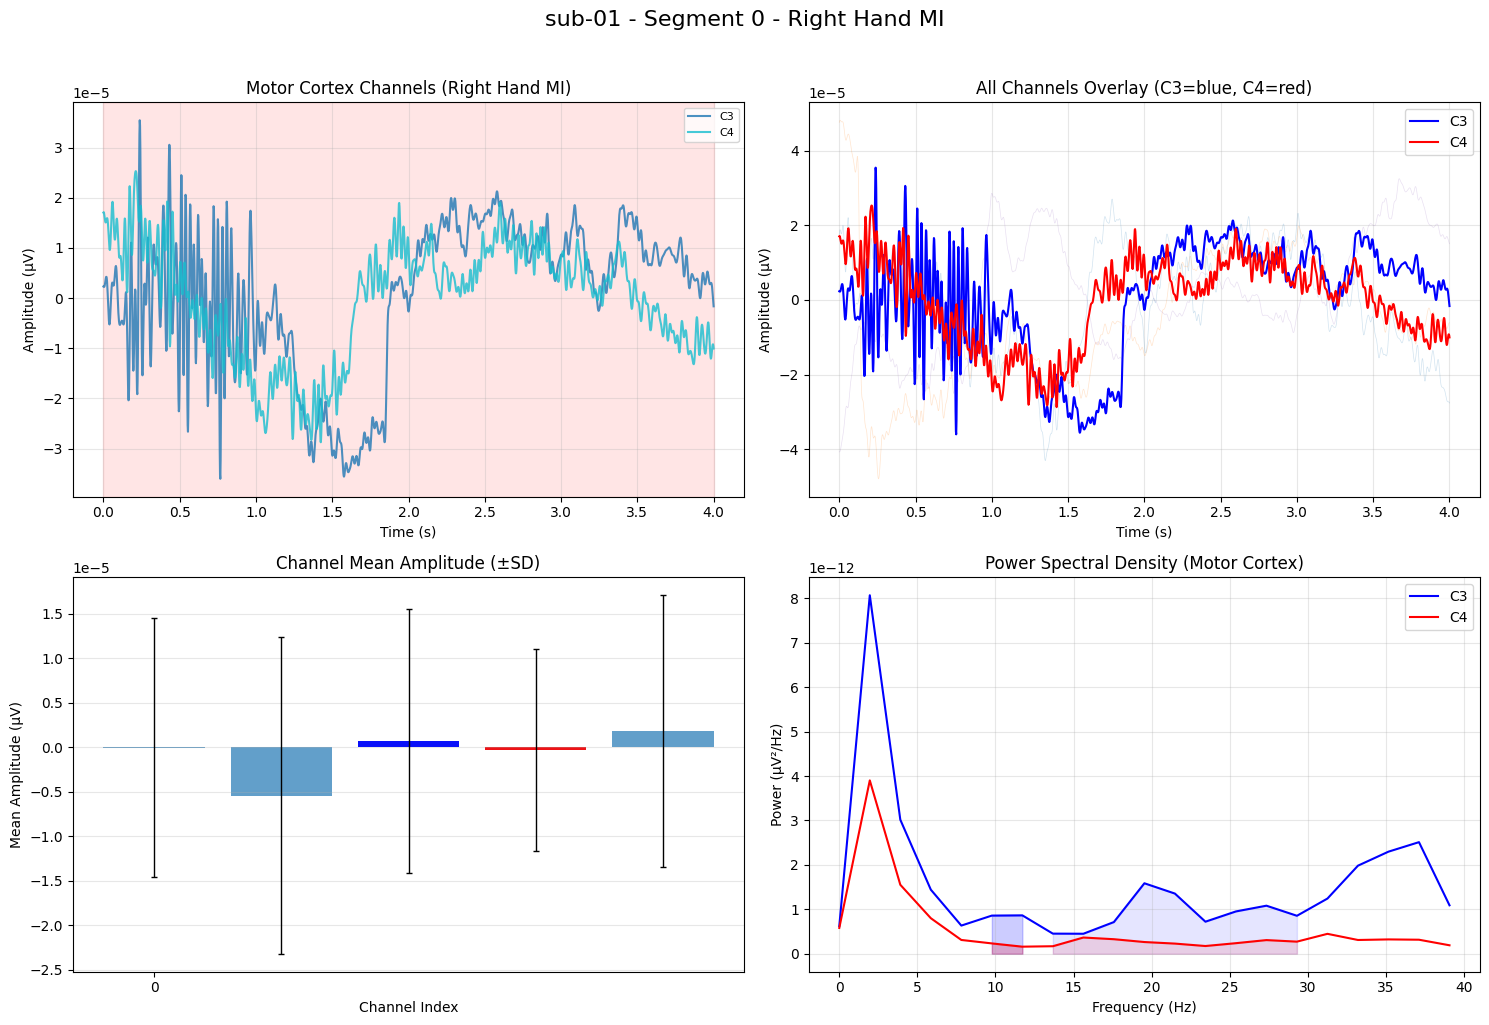


📊 Segment 0 Statistics:
  Subject: sub-01
  Label: 2 (Right hand)
  Shape: (5, 2000)
  C3: 0.00 ± 0.00 μV
  C4: -0.00 ± 0.00 μV


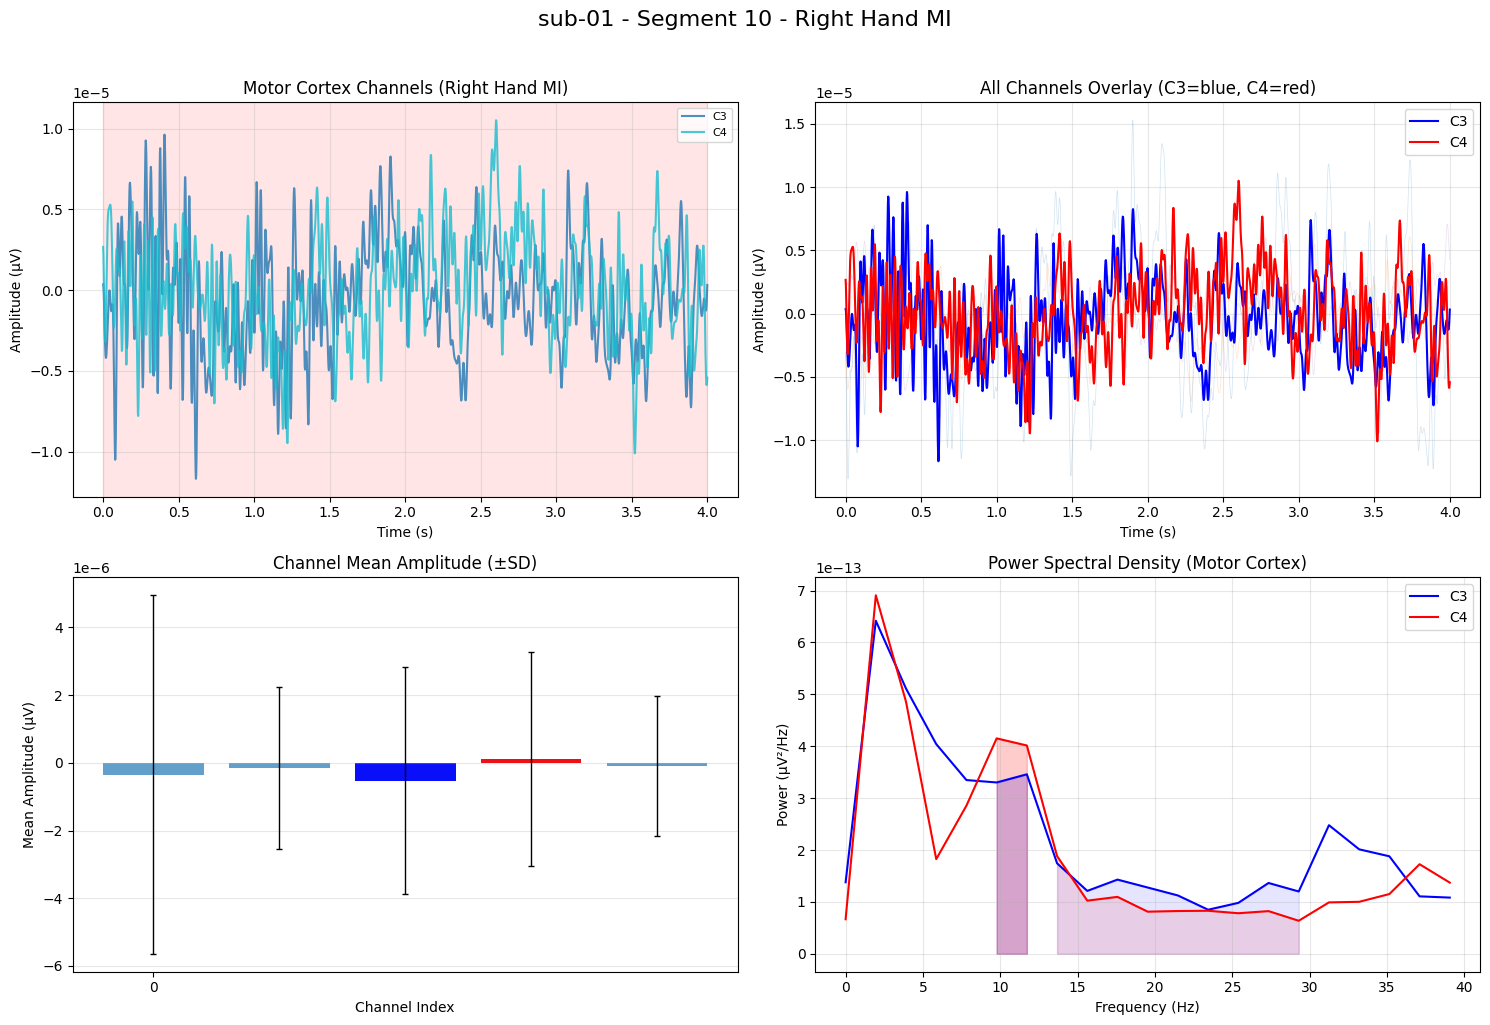


📊 Segment 10 Statistics:
  Subject: sub-01
  Label: 2 (Right hand)
  Shape: (5, 2000)
  C3: -0.00 ± 0.00 μV
  C4: 0.00 ± 0.00 μV


In [1]:
# ============================================
# COMPLETE SOLUTION: Labeling with .edf files and event markers
# ============================================
import os
import numpy as np
import pandas as pd
import mne
from mne.io import read_raw_edf
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set base path
base_path = r"D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2"

# ============================================
# STEP 1: Understand Event Marker Structure
# ============================================
print("="*60)
print("STEP 1: Analyzing Event Marker Structure")
print("="*60)

# Load event markers
events_path = os.path.join(base_path, "events", "task-motor-imagery_events.tsv")
events_df = pd.read_csv(events_path, sep='\t')

print(f"Total events: {len(events_df)}")
print(f"Event columns: {events_df.columns.tolist()}")
print("\nFirst 15 events:")
print(events_df.head(15))

# Convert milliseconds to seconds for easier understanding
events_df['onset_seconds'] = events_df['onset'] / 1000.0
events_df['duration_seconds'] = events_df['duration'] / 1000.0

print("\nEvent types and durations:")
print(events_df['trial_type'].value_counts())
print("\nEvent values (likely labels):")
print(events_df['value'].value_counts())

# Based on the event file structure:
# - 'onset' is in milliseconds
# - 'duration' is in milliseconds
# - 'value' seems to be the label: 1, 2, or 3
# - 'trial_type' might indicate something else

# ============================================
# STEP 2: Understand the Task Structure from Paper
# ============================================
print("\n" + "="*60)
print("STEP 2: Understanding Task Structure from Paper")
print("="*60)

"""
From the paper (Page 2-3):
1. Each trial = 8 seconds total
   - Instruction stage: 2 seconds (value=1)
   - Motor Imagery stage: 4 seconds (value=2)  ← THIS IS WHAT WE WANT
   - Break stage: 2 seconds (value=3)

2. Event file shows:
   onset=1, duration=2000, value=1     → 2s instruction
   onset=2001, duration=4000, value=2  → 4s MI (what we want!)
   onset=6001, duration=2000, value=3  → 2s break
   
3. Pattern repeats for 40 trials
"""

# Filter for MI events (value=2, duration=4000ms)
mi_events = events_df[(events_df['value'] == 2) & (events_df['duration'] == 4000)].copy()
print(f"\nFound {len(mi_events)} Motor Imagery events (value=2, duration=4000ms)")

# Check if we have 40 MI events (as per paper)
if len(mi_events) == 40:
    print("✅ Matches paper: 40 MI events")
else:
    print(f"⚠️ Unexpected: {len(mi_events)} MI events, expected 40")

# ============================================
# STEP 3: Load and Inspect a Preprocessed .edf File
# ============================================
print("\n" + "="*60)
print("STEP 3: Loading Preprocessed .edf File")
print("="*60)

# Find .edf files
preprocessed_path = os.path.join(base_path, "paper_preprocessed")
edf_files = [f for f in os.listdir(preprocessed_path) if f.endswith('.edf')]

if edf_files:
    sample_edf = os.path.join(preprocessed_path, edf_files[0])
    print(f"Loading: {edf_files[0]}")
    
    # Load the .edf file
    raw = read_raw_edf(sample_edf, preload=True, verbose=False)
    
    print(f"\n✅ Loaded successfully")
    print(f"  Subject ID: {edf_files[0].split('_')[0]}")
    print(f"  Sampling rate: {raw.info['sfreq']} Hz")
    print(f"  Channels: {len(raw.ch_names)}")
    print(f"  Channel names: {raw.ch_names[:10]}...")  # First 10 channels
    
    # Check duration
    duration = raw.times[-1]
    print(f"  Recording duration: {duration:.2f} seconds ({duration*1000:.0f} ms)")
    
    # Plot a quick overview
    # fig = raw.plot(duration=10, n_channels=10, scalings='auto', show=False)
    # plt.title(f"EEG Overview - {edf_files[0]}")
    # plt.show()
    
else:
    print(f"❌ No .edf files found in {preprocessed_path}")

# ============================================
# STEP 4: Create Labeling Function with Events
# ============================================
def extract_labeled_segments_from_edf(edf_filepath, events_df, subject_id, 
                                      sampling_rate=500, verbose=True):
    """
    Extract labeled MI segments from .edf file using event markers
    
    Parameters:
    -----------
    edf_filepath : str
        Path to .edf file
    events_df : DataFrame
        Event markers DataFrame
    subject_id : str
        Subject identifier
    sampling_rate : int
        Expected sampling rate
    verbose : bool
        Print detailed information
        
    Returns:
    --------
    labeled_data : dict
        Dictionary containing extracted segments and labels
    """
    
    if verbose:
        print(f"\n📊 Processing {subject_id}...")
    
    # Load .edf file
    raw = read_raw_edf(edf_filepath, preload=True, verbose=False)
    
    # Verify sampling rate
    actual_sfreq = raw.info['sfreq']
    if abs(actual_sfreq - sampling_rate) > 1:
        print(f"  ⚠️ Warning: Sampling rate mismatch: {actual_sfreq} Hz (expected {sampling_rate} Hz)")
        sampling_rate = actual_sfreq
    
    # Get channel names (EEG channels only, exclude EOG/marker if present)
    eeg_ch_names = [ch for ch in raw.ch_names if 'EEG' in ch or ch in ['C3', 'C4', 'Cz', 'Fz', 'Pz']]
    if not eeg_ch_names:
        eeg_ch_names = raw.ch_names[:30]  # Assume first 30 are EEG
    
    # Filter events for this subject (all subjects share same event timings)
    # Since event file is global, we use all events
    mi_events = events_df[(events_df['value'] == 2) & (events_df['duration'] == 4000)].copy()
    
    # Convert milliseconds to seconds for MNE
    mi_events['onset_seconds'] = mi_events['onset'] / 1000.0
    mi_events['duration_seconds'] = mi_events['duration'] / 1000.0
    
    # Extract data for EEG channels
    eeg_data, times = raw[eeg_ch_names, :]
    
    if verbose:
        print(f"  EEG data shape: {eeg_data.shape}")
        print(f"  Time points: {len(times)}")
        print(f"  EEG channels: {len(eeg_ch_names)}")
        print(f"  MI events found: {len(mi_events)}")
    
    # Extract MI segments based on event markers
    segments = []
    labels = []
    event_info = []
    
    for idx, event in mi_events.iterrows():
        start_sec = event['onset_seconds']
        duration_sec = event['duration_seconds']
        end_sec = start_sec + duration_sec
        
        # Find corresponding sample indices
        start_sample = int(start_sec * sampling_rate)
        end_sample = int(end_sec * sampling_rate)
        
        # Check bounds
        if end_sample <= eeg_data.shape[1]:
            # Extract segment
            segment = eeg_data[:, start_sample:end_sample]  # Shape: (channels, samples)
            segments.append(segment)
            
            # Determine label based on alternating pattern or trial_type
            # From paper: alternating left/right starting with left
            # event index 0, 2, 4, ... = left hand (label 1)
            # event index 1, 3, 5, ... = right hand (label 2)
            if idx % 2 == 0:  # Even indices: left hand
                label = 1
                hand = "left"
            else:  # Odd indices: right hand
                label = 2
                hand = "right"
            
            labels.append(label)
            
            event_info.append({
                'event_index': idx,
                'onset_seconds': start_sec,
                'duration_seconds': duration_sec,
                'onset_sample': start_sample,
                'end_sample': end_sample,
                'label': label,
                'hand': hand
            })
        else:
            if verbose:
                print(f"  ⚠️ Event {idx} at {start_sec:.1f}s exceeds data length")
    
    if segments:
        # Convert list to numpy array
        segments_array = np.array(segments)  # Shape: (n_segments, n_channels, n_samples)
        labels_array = np.array(labels)
        
        if verbose:
            print(f"\n✅ Extraction complete:")
            print(f"  Extracted segments: {len(segments_array)}")
            print(f"  Segments shape: {segments_array.shape}")
            print(f"  Labels: {labels_array[:10]}...")  # First 10 labels
            
            # Label distribution
            unique_labels, counts = np.unique(labels_array, return_counts=True)
            for label, count in zip(unique_labels, counts):
                hand = "Left" if label == 1 else "Right"
                percentage = count / len(labels_array) * 100
                print(f"  {hand} hand MI: {count} segments ({percentage:.1f}%)")
    
        return {
            'segments': segments_array,
            'labels': labels_array,
            'event_info': pd.DataFrame(event_info),
            'channels': eeg_ch_names,
            'sampling_rate': sampling_rate,
            'subject_id': subject_id,
            'duration_per_segment': 4.0  # seconds
        }
    else:
        print(f"  ❌ No segments extracted")
        return None

# ============================================
# STEP 5: Test with One Subject
# ============================================
print("\n" + "="*60)
print("STEP 5: Testing Labeling with One Subject")
print("="*60)

if edf_files:
    # Test with first subject
    test_edf = os.path.join(preprocessed_path, edf_files[0])
    subject_id = edf_files[0].split('_')[0]  # e.g., 'sub-01'
    
    result = extract_labeled_segments_from_edf(
        test_edf, 
        events_df, 
        subject_id,
        sampling_rate=500,
        verbose=True
    )
    
    if result:
        # Quick visualization
        print(f"\n📈 Data summary for {subject_id}:")
        print(f"  Segments shape: {result['segments'].shape}")
        print(f"  Labels shape: {result['labels'].shape}")
        print(f"  Sampling rate: {result['sampling_rate']} Hz")
        print(f"  Channels: {len(result['channels'])}")
        print(f"  Channel names: {result['channels'][:5]}...")  # First 5

# ============================================
# STEP 6: Create Channel Mapping for Motor Cortex
# ============================================
print("\n" + "="*60)
print("STEP 6: Creating Channel Mapping")
print("="*60)

# Based on paper Table 2 and typical 10-10 system
channel_mapping = {
    'C3': 'EEG C3',  # Left motor cortex
    'C4': 'EEG C4',  # Right motor cortex
    'Cz': 'EEG Cz',  # Central
    'FC3': 'EEG FC3', # Front-central left
    'FC4': 'EEG FC4', # Front-central right
    'CP3': 'EEG CP3', # Centro-parietal left
    'CP4': 'EEG CP4', # Centro-parietal right
}

print("Important motor cortex channels for MI analysis:")
for short_name, long_name in channel_mapping.items():
    print(f"  {short_name}: {long_name}")

# ============================================
# STEP 7: Enhanced Visualization with Event Alignment
# ============================================
def visualize_labeled_segments(result, segment_idx=0, show_channels=None):
    """
    Visualize labeled EEG segments with event alignment
    
    Parameters:
    -----------
    result : dict
        Result from extract_labeled_segments_from_edf
    segment_idx : int
        Index of segment to visualize
    show_channels : list or None
        Specific channels to show
    """
    
    if result is None or len(result['segments']) == 0:
        print("No data to visualize")
        return
    
    if segment_idx >= len(result['segments']):
        print(f"Segment index {segment_idx} out of bounds (max: {len(result['segments'])-1})")
        return
    
    # Get data
    segment = result['segments'][segment_idx]  # Shape: (channels, samples)
    label = result['labels'][segment_idx]
    hand = "Left" if label == 1 else "Right"
    
    # Create time axis (4 seconds)
    sampling_rate = result['sampling_rate']
    duration = 4.0  # seconds
    time_axis = np.linspace(0, duration, segment.shape[1])
    
    # Select channels to display
    if show_channels is None:
        # Default: show motor cortex channels if available
        available_channels = result['channels']
        motor_channels = []
        for ch in ['C3', 'C4', 'Cz', 'FC3', 'FC4']:
            # Try to find the channel
            for avail_ch in available_channels:
                if ch in avail_ch.upper():
                    motor_channels.append(avail_ch)
                    break
        
        if len(motor_channels) >= 2:
            show_channels = motor_channels[:4]  # Show up to 4 motor channels
        else:
            show_channels = available_channels[:4]  # Show first 4 available
    
    # Get channel indices
    channel_indices = [result['channels'].index(ch) for ch in show_channels if ch in result['channels']]
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{result["subject_id"]} - Segment {segment_idx} - {hand} Hand MI', 
                 fontsize=16, y=1.02)
    
    # Plot 1: Individual channels
    colors = plt.cm.tab10(np.linspace(0, 1, len(channel_indices)))
    for i, (ch_idx, color) in enumerate(zip(channel_indices, colors)):
        if i < 4:  # Plot up to 4 channels
            axes[0, 0].plot(time_axis, segment[ch_idx, :], 
                           color=color, linewidth=1.5, alpha=0.8, 
                           label=f'{result["channels"][ch_idx]}')
    
    axes[0, 0].set_title(f'Motor Cortex Channels ({hand} Hand MI)')
    axes[0, 0].set_xlabel('Time (s)')
    axes[0, 0].set_ylabel('Amplitude (μV)')
    axes[0, 0].legend(loc='upper right', fontsize=8)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add shaded region for MI period
    axes[0, 0].axvspan(0, 4, alpha=0.1, color='blue' if hand == 'Left' else 'red')
    
    # Plot 2: All channels overlay (transparent)
    axes[0, 1].plot(time_axis, segment.T, alpha=0.2, linewidth=0.5)
    # Highlight C3 and C4 if available
    for ch_name, color in [('C3', 'blue'), ('C4', 'red')]:
        for i, avail_ch in enumerate(result['channels']):
            if ch_name in avail_ch.upper():
                axes[0, 1].plot(time_axis, segment[i, :], color=color, 
                               linewidth=1.5, label=ch_name)
                break
    axes[0, 1].set_title('All Channels Overlay (C3=blue, C4=red)')
    axes[0, 1].set_xlabel('Time (s)')
    axes[0, 1].set_ylabel('Amplitude (μV)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Channel means for this segment
    channel_means = np.mean(segment, axis=1)
    channel_stds = np.std(segment, axis=1)
    
    x_pos = np.arange(len(result['channels']))
    axes[1, 0].bar(x_pos, channel_means, yerr=channel_stds, 
                   capsize=2, alpha=0.7, error_kw={'elinewidth': 1})
    axes[1, 0].set_title('Channel Mean Amplitude (±SD)')
    axes[1, 0].set_xlabel('Channel Index')
    axes[1, 0].set_ylabel('Mean Amplitude (μV)')
    axes[1, 0].set_xticks(x_pos[::5])
    axes[1, 0].set_xticklabels([f'{i}' for i in x_pos[::5]])
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Highlight motor cortex channels
    motor_indices = []
    for ch_name in ['C3', 'C4', 'Cz']:
        for i, avail_ch in enumerate(result['channels']):
            if ch_name in avail_ch.upper():
                motor_indices.append(i)
                axes[1, 0].bar(i, channel_means[i], 
                              color='red' if 'C4' in ch_name else 'blue' if 'C3' in ch_name else 'green',
                              alpha=0.9)
    
    # Plot 4: Frequency spectrum for C3 and C4
    axes[1, 1].clear()
    if motor_indices:
        from scipy import signal
        
        for i in motor_indices[:2]:  # Show first 2 motor channels
            ch_name = result['channels'][i]
            # Compute PSD
            f, Pxx = signal.welch(segment[i, :], fs=sampling_rate, nperseg=256)
            
            # Plot only relevant frequencies (0-40 Hz)
            mask = f <= 40
            color = 'blue' if 'C3' in ch_name.upper() else 'red' if 'C4' in ch_name.upper() else 'green'
            axes[1, 1].plot(f[mask], Pxx[mask], color=color, linewidth=1.5, label=ch_name)
            
            # Highlight alpha (8-13 Hz) and beta (13-30 Hz) bands
            alpha_mask = (f >= 8) & (f <= 13)
            beta_mask = (f >= 13) & (f <= 30)
            
            if np.any(alpha_mask):
                axes[1, 1].fill_between(f[alpha_mask], 0, Pxx[alpha_mask], 
                                       alpha=0.2, color=color)
            if np.any(beta_mask):
                axes[1, 1].fill_between(f[beta_mask], 0, Pxx[beta_mask], 
                                       alpha=0.1, color=color)
        
        axes[1, 1].set_title('Power Spectral Density (Motor Cortex)')
        axes[1, 1].set_xlabel('Frequency (Hz)')
        axes[1, 1].set_ylabel('Power (μV²/Hz)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'No motor cortex channels found', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Power Spectral Density')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n📊 Segment {segment_idx} Statistics:")
    print(f"  Subject: {result['subject_id']}")
    print(f"  Label: {label} ({hand} hand)")
    print(f"  Shape: {segment.shape}")
    
    # Find and print motor channel statistics
    for ch_name in ['C3', 'C4']:
        for i, avail_ch in enumerate(result['channels']):
            if ch_name in avail_ch.upper():
                mean_val = np.mean(segment[i, :])
                std_val = np.std(segment[i, :])
                print(f"  {ch_name}: {mean_val:.2f} ± {std_val:.2f} μV")
                break

# Test visualization
if 'result' in locals() and result:
    print("\n" + "="*60)
    print("VISUALIZING EXTRACTED SEGMENT")
    print("="*60)
    visualize_labeled_segments(result, segment_idx=0)

# ============================================
# STEP 8: Batch Process All Subjects
# ============================================
def process_all_subjects_with_events(base_path, max_subjects=None, save_results=True):
    """
    Process all subjects using .edf files and event markers
    
    Parameters:
    -----------
    base_path : str
        Base path to organized_data_v2
    max_subjects : int or None
        Maximum number of subjects to process
    save_results : bool
        Whether to save extracted data
        
    Returns:
    --------
    all_results : dict
        Dictionary with results for all subjects
    """
    
    # Load events
    events_path = os.path.join(base_path, "events", "task-motor-imagery_events.tsv")
    events_df = pd.read_csv(events_path, sep='\t')
    
    # Get .edf files
    preprocessed_path = os.path.join(base_path, "paper_preprocessed")
    edf_files = sorted([f for f in os.listdir(preprocessed_path) if f.endswith('.edf')])
    
    if max_subjects:
        edf_files = edf_files[:max_subjects]
    
    print(f"\n" + "="*60)
    print(f"PROCESSING {len(edf_files)} SUBJECTS USING EVENT MARKERS")
    print("="*60)
    
    all_results = {}
    
    for i, edf_file in enumerate(edf_files):
        subject_id = edf_file.split('_')[0]  # 'sub-01'
        print(f"\n[{i+1}/{len(edf_files)}] Processing {subject_id}")
        
        try:
            # Extract labeled segments
            edf_path = os.path.join(preprocessed_path, edf_file)
            result = extract_labeled_segments_from_edf(
                edf_path, 
                events_df, 
                subject_id,
                sampling_rate=500,
                verbose=False
            )
            
            if result and len(result['segments']) > 0:
                all_results[subject_id] = result
                print(f"  ✅ Extracted {len(result['segments'])} segments")
                
                # Save individual results
                if save_results:
                    save_dir = os.path.join(base_path, "results", "event_labeled_data")
                    os.makedirs(save_dir, exist_ok=True)
                    
                    save_path = os.path.join(save_dir, f"{subject_id}_event_labeled.npz")
                    np.savez_compressed(
                        save_path,
                        segments=result['segments'],
                        labels=result['labels'],
                        channels=result['channels'],
                        event_info=result['event_info'].to_dict('records'),
                        subject_id=result['subject_id'],
                        sampling_rate=result['sampling_rate'],
                        duration=result['duration_per_segment']
                    )
                    print(f"  💾 Saved to: {save_path}")
            else:
                print(f"  ⚠️ No segments extracted")
                
        except Exception as e:
            print(f"  ❌ Error processing {subject_id}: {e}")
    
    # Create summary and combined dataset
    if all_results and save_results:
        print(f"\n" + "="*60)
        print("CREATING COMBINED DATASET")
        print("="*60)
        
        # Combine all data
        all_segments = []
        all_labels = []
        all_subject_ids = []
        
        for subject_id, result in all_results.items():
            all_segments.append(result['segments'])
            all_labels.append(result['labels'])
            all_subject_ids.extend([subject_id] * len(result['labels']))
        
        all_segments = np.vstack(all_segments)
        all_labels = np.concatenate(all_labels)
        
        print(f"Combined dataset statistics:")
        print(f"  Total subjects: {len(all_results)}")
        print(f"  Total segments: {len(all_segments)}")
        print(f"  Segments shape: {all_segments.shape}")
        
        # Label distribution
        unique_labels, counts = np.unique(all_labels, return_counts=True)
        print(f"\nOverall label distribution:")
        for label, count in zip(unique_labels, counts):
            percentage = count / len(all_labels) * 100
            hand = "Left" if label == 1 else "Right"
            print(f"  {hand} hand MI: {count} segments ({percentage:.1f}%)")
        
        # Save combined dataset
        combined_dir = os.path.join(base_path, "results")
        os.makedirs(combined_dir, exist_ok=True)
        
        combined_path = os.path.join(combined_dir, "event_labeled_combined.npz")
        np.savez_compressed(
            combined_path,
            segments=all_segments,
            labels=all_labels,
            subject_ids=np.array(all_subject_ids),
            sampling_rate=500,
            duration_per_segment=4.0,
            n_subjects=len(all_results),
            n_segments=len(all_segments)
        )
        
        print(f"\n💾 Combined dataset saved to: {combined_path}")
        
        # Create summary CSV
        summary_data = []
        for subject_id, result in all_results.items():
            subject_labels = result['labels']
            left_count = np.sum(subject_labels == 1)
            right_count = np.sum(subject_labels == 2)
            
            summary_data.append({
                'subject_id': subject_id,
                'total_segments': len(subject_labels),
                'left_hand_segments': left_count,
                'right_hand_segments': right_count,
                'left_percentage': left_count / len(subject_labels) * 100,
                'right_percentage': right_count / len(subject_labels) * 100,
                'channels': len(result['channels']),
                'samples_per_segment': result['segments'].shape[2]
            })
        
        summary_df = pd.DataFrame(summary_data)
        summary_path = os.path.join(combined_dir, "event_labeled_summary.csv")
        summary_df.to_csv(summary_path, index=False)
        print(f"📊 Summary saved to: {summary_path}")
    
    return all_results

# ============================================
# STEP 9: Run the Pipeline
# ============================================
print("\n" + "="*60)
print("STEP 9: Ready to Process Full Dataset")
print("="*60)

print("To process the dataset using event markers, run:")
print("""
# Test with 2 subjects
print("Testing with 2 subjects using event markers...")
test_results = process_all_subjects_with_events(base_path, max_subjects=2, save_results=True)

# Visualize results
if test_results and 'sub-01' in test_results:
    visualize_labeled_segments(test_results['sub-01'], segment_idx=0)
    visualize_labeled_segments(test_results['sub-01'], segment_idx=1)

# Process all subjects
print("\\nProcessing all subjects using event markers...")
all_results = process_all_subjects_with_events(base_path, save_results=True)
""")

# ============================================
# STEP 10: Quick Test Run
# ============================================
print("\n" + "="*60)
print("QUICK TEST RUN")
print("="*60)

# Run a quick test with 1 subject
print("Running quick test with 1 subject...")
test_results = process_all_subjects_with_events(base_path, max_subjects=1, save_results=True)

if test_results:
    first_subject = list(test_results.keys())[0]
    print(f"\n✅ Test successful for {first_subject}")
    print(f"   Segments extracted: {len(test_results[first_subject]['segments'])}")
    print(f"   Data saved to: results/event_labeled_data/")
    
    # Quick visualization
    visualize_labeled_segments(test_results[first_subject], segment_idx=0)
    visualize_labeled_segments(test_results[first_subject], segment_idx=10)
else:
    print("\n❌ Test failed - no results extracted")